<a href="https://colab.research.google.com/github/Joe-hyper/DSW6C/blob/main/Python_Notebook_IP_Week_6_Core_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question.**

### a) Specifying the question
      Predict result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b) Defining the metric for success
      Attaining a high level accuracy for each model used.

### c) Understanding the context
      You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

      A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

      You have two possible approaches given the datasets that will be provided

### d) Recording the experimental design
      

      *   Perform an EDA
      *   Perform any necessary feature engineering
      *   Check for multicollinearity
      *   Build a model
      *   Cross-validate the model
      *   Compute Root Mean Squared Error
      *   Create residual plots for models created, and assess their heteroscedasticity using Bartlett’s test

# **2. Importing Libraries.**

In [53]:
# importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
from scipy import stats
import os
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings('ignore')

# **3. Loading the Data.**

In [54]:
# loading fifa ranking and results dataset
# fifa dataset
fifa = pd.read_csv('fifa_ranking.csv')
# results dataset
results = pd.read_csv('results.csv')

# **4. Data Understanding.**

In [55]:
# In this section we shall check the data on both our datasets
# number of records fifa dataset
print(f'The dataset has {fifa.shape[0]} records, and {fifa.shape[1]} columns.')
print(f'The dataset has {results.shape[0]} records, and {results.shape[1]} columns.')

The dataset has 57793 records, and 16 columns.
The dataset has 40839 records, and 9 columns.


        We can observe that there are are 57,793 instances in our fifa_ranking dataset.
         We can observe that there are are 57,793 instances in our results dataset.

In [56]:
# lets check out our columns in both datasets
print('columns in fifa dataset are' + str(fifa.columns))
print('columns in results dataset are' + str(results.columns))

columns in fifa dataset areIndex(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')
columns in results dataset areIndex(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


In [57]:
# lets check the info of the datasets
# observe the data types of our variables
fifa.info()
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [58]:
# lets preview our fifa dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [59]:
# lets preview our results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# **5. Data Preparation.**

a) Validity

In [60]:
# Here we shall drop any unnecceary columns in both our data sets
# we shall start with the fifa data set
fifa.drop(['rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'country_abrv', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'country_abrv'] , inplace= True, axis = 1)
fifa.head()

,rank,country_full,total_points,previous_points,rank_date
0,1,Germany,0.0,57,1993-08-08
1,2,Italy,0.0,57,1993-08-08
2,3,Switzerland,0.0,50,1993-08-08
3,4,Sweden,0.0,55,1993-08-08
4,5,Argentina,0.0,51,1993-08-08


In [ ]:
# results dataset
# dropping unnecessary columns
results.drop(['city', 'neutral'] , inplace=True, axis=1)


b) Completeness

In [62]:
# In this section we are checking for missing values
# fifa df
# results df
print(fifa.isnull().sum())
print(results.isnull().sum())
# we dont have any missing data in both our dfs

rank               0
country_full       0
total_points       0
previous_points    0
rank_date          0
dtype: int64
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64


c) Consistency

In [63]:
# lets check for any duplicate values.
# fifa df
# lets check for any duplicate values
fifa.duplicated().any().any()

True

In [64]:
# results df
results.duplicated().any().any()

True

In [65]:
# drop duplicates in both dfs
fifa = fifa.drop_duplicates()
results = results.drop_duplicates()

d) Uniformity

In [66]:
# Our date columns in both datasets are in wrong format.
# we need to convert the dtype
# fifa df
# changing rank date dtype to datetime
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'])
# results df
results['date'] = pd.to_datetime(results['date'])

In [67]:
# in our tournament column, we are only interested in friendly matches as per our context, we shall therfore define a function that shall return the tournamnt type
def tournament_type (t):
    if t == 'Friendly':
        return 'Friendly'
    return 'Other'
    
# apply the function to the 'tournament' column
results['tournament'] = results['tournament'].apply(lambda t: tournament_type(t))

e) Dealing with Outliers

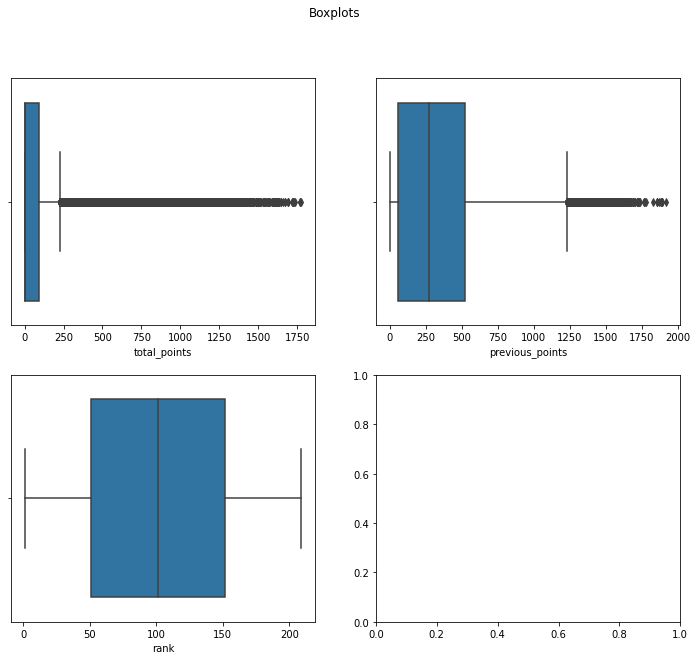

In [68]:
# checking for outliers in fifa df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12, 10))
fig.suptitle('Boxplots')
sns.boxplot(fifa['total_points'], ax=ax1)
sns.boxplot(fifa['previous_points'], ax=ax2)
sns.boxplot(fifa['rank'], ax=ax3)

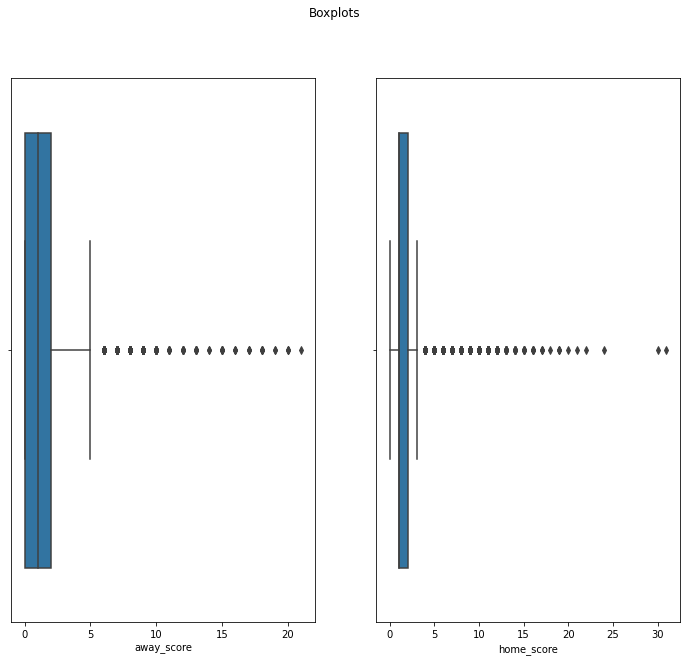

In [69]:
# checking for outliers in results df
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 10))
fig.suptitle('Boxplots')
sns.boxplot(results['away_score'], ax=ax1)
sns.boxplot(results['home_score'], ax=ax2)


      We shall not do away with any outliers in both data sets as crucial information needed for prediction might be lost.

### Merging of datasets

In [70]:
# we first need to get a df for the home team
# we shall conduct an inner join
Hteam = pd.merge(results, fifa, how = 'inner', right_on =['rank_date', 'country_full'], left_on = ['date', 'home_team'])

# preview the merged home team df
Hteam.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,total_points,previous_points,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,Other,Bolivia,59,Bolivia,0.0,13,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,Brazil,0.0,55,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,Other,Ecuador,35,Ecuador,0.0,23,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,Guinea,0.0,23,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,Other,Paraguay,67,Paraguay,0.0,22,1993-08-08


In [71]:
# from previewing the hteam dataset, we observe that some columns are not specific and this being a home team merge we expect details to be for the home side
# therefore we shall rename the rank and country full column
Hteam.rename({'rank':'home_rank','country_full':'home_country'}, axis= 1, inplace = True)
Hteam.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,total_points,previous_points,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,Other,Bolivia,59,Bolivia,0.0,13,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,Brazil,0.0,55,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,Other,Ecuador,35,Ecuador,0.0,23,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,Guinea,0.0,23,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,Other,Paraguay,67,Paraguay,0.0,22,1993-08-08


In [72]:
# away team
Ateam = pd.merge(results, fifa, how = 'inner', left_on = ['date', 'away_team'], right_on =['rank_date', 'country_full'])


In [73]:
# from previewing the hteam dataset, we observe that some columns are not specific and this being a away team merge we expect details to be for the away side
# therefore we shall rename the rank and country full column
Ateam.rename({'rank':'away_rank','country_full':'away_country'}, axis= 1, inplace = True)
Ateam.head()

,date,home_team,away_team,home_score,away_score,tournament,country,away_rank,away_country,total_points,previous_points,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,Other,Bolivia,22,Uruguay,0.0,47,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,14,Mexico,0.0,42,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,Other,Ecuador,94,Venezuela,0.0,4,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,86,Sierra Leone,0.0,16,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,Other,Paraguay,5,Argentina,0.0,51,1993-08-08


In [74]:
# merging both away and home merged dfs
finaldf = pd.merge(Hteam, Ateam, how='inner', left_on=['date','away_team','home_score','away_score','home_team','tournament','country'],right_on=['date','away_team','home_score','away_score','home_team','tournament', 'country'])
finaldf.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,home_country,total_points_x,previous_points_x,rank_date_x,away_rank,away_country,total_points_y,previous_points_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,Other,Bolivia,59,Bolivia,0.0,13,1993-08-08,22,Uruguay,0.0,47,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,Brazil,0.0,55,1993-08-08,14,Mexico,0.0,42,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,Other,Ecuador,35,Ecuador,0.0,23,1993-08-08,94,Venezuela,0.0,4,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,Guinea,0.0,23,1993-08-08,86,Sierra Leone,0.0,16,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,Other,Paraguay,67,Paraguay,0.0,22,1993-08-08,5,Argentina,0.0,51,1993-08-08


In [75]:
# dropping unnecessary columns
finaldf.drop(['total_points_x', 'total_points_y', 'previous_points_x', 'previous_points_y', 'rank_date_x', 'rank_date_y', 'home_country', 'away_country'], inplace=True, axis=1)

In [76]:
# previewing the merged df for both home and away teams
finaldf.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,Other,Bolivia,59,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,14
2,1993-08-08,Ecuador,Venezuela,5,0,Other,Ecuador,35,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,86
4,1993-08-08,Paraguay,Argentina,1,3,Other,Paraguay,67,5


In [77]:
# We still need to find out the result/outcome of each game if we are to predict any future games
finaldf['Outcome'] = finaldf.home_score - finaldf.away_score

def Outcome(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'



finaldf['Outcome'] = finaldf.Outcome.apply(lambda x: Outcome(x))
finaldf.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,away_rank,Outcome
0,1993-08-08,Bolivia,Uruguay,3,1,Other,Bolivia,59,22,Win
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,14,Draw
2,1993-08-08,Ecuador,Venezuela,5,0,Other,Ecuador,35,94,Win
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,86,Win
4,1993-08-08,Paraguay,Argentina,1,3,Other,Paraguay,67,5,Lose


# **6. Analysis**

### **a) Univariate Analysis**

### i) Categorical variables

In [78]:
# lets get a list of our categorical columns
categorical = list(finaldf.select_dtypes(include = ['object']).columns)
categorical

['home_team', 'away_team', 'tournament', 'country', 'Outcome']

      We have 5 categorical variables

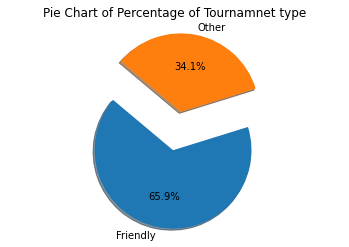

In [79]:
# lets visualize via a pie chart the ratio of the tournament type
plt.pie(finaldf['tournament'].value_counts(normalize=True), labels =finaldf['tournament'].value_counts().index, autopct = '%1.1f%%', shadow = True,explode=(0.5,0), startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Percentage of Tournamnet type')
plt.show()

      Most games played were friendly matches, 34.1% were other tournaments.

In [81]:
# defining function for categorical plots
# Categorical Plots
def CatPlots(column, finaldf):
  fig,ax  = plt.subplots(figsize = (10,5))
  sns.countplot(finaldf[column], palette = 'flare', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)

  plt.show()


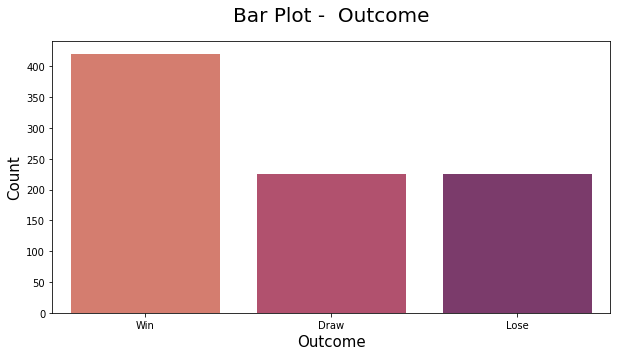

In [82]:
# bar plot explaining frequency distribution of Outcome category
CatPlots('Outcome', finaldf)

      We observe that wins have the highest frequency, Meaning a win is likely in most matches between two teams; although this isnt guranteed.

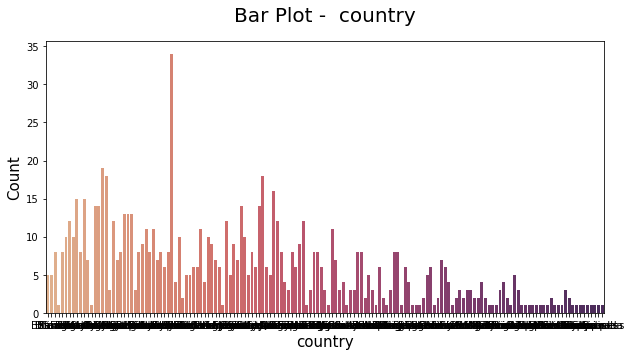

In [86]:
# country frequency distribution
CatPlots('country', finaldf)

      Majority number of games were played in the United States. This could be due to the fact that most friendly competitions are hosted in the USA.

### ii)Numerical variables

In [97]:
# lets get a list of our numerical columns
numerical = list(finaldf.select_dtypes(include = ['integer']).columns)
numerical

['home_score', 'away_score', 'home_rank', 'away_rank']

In [99]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, finaldf):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {finaldf[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {finaldf[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {finaldf[column].mode()}")

In [100]:
# Mean
MeasureCentral('mean', numerical, finaldf)

home_score column mean = 1.632606199770379
away_score column mean = 1.0045924225028702
home_rank column mean = 65.54994259471871
away_rank column mean = 69.91848450057405


      The average number of home goals scored is 1.63
      The average number of away goals scored is 1.
      This gives insight that away grounds are tough places to visit for teams ; teams are less likely to lose at home.

In [101]:
# Median
MeasureCentral('median', numerical, finaldf)

home_score column median = 1.0
away_score column median = 1.0
home_rank column median = 58.0
away_rank column median = 61.0


      Most values for home and away scores lie at a a midpoint of 1

**Measures of dispersion**

In [102]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, finaldf):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {finaldf[column].max() - finaldf[column].min()}")
    elif measure == 'IQR':
      Q1 = finaldf[column].quantile(0.25)
      Q3 = finaldf[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {finaldf[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {finaldf[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {finaldf[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {finaldf[column].kurt()}")

In [103]:
# Range
MeasureDistribution('range', numerical, finaldf)

home_score column range = 31
away_score column range = 9
home_rank column range = 205
away_rank column range = 208


In [104]:
MeasureDistribution('IQR', numerical, finaldf)

home_score column IQR = 2.0
away_score column IQR = 2.0
home_rank column IQR = 68.0
away_rank column IQR = 74.5


In [105]:
MeasureDistribution('var', numerical, finaldf)

home_score column variance = 3.632682740145451
away_score column variance = 1.3333122187471238
home_rank column variance = 2261.7627327553205
away_rank column variance = 2550.0128878155638


In [106]:
MeasureDistribution('kurt', numerical, finaldf)

home_score column kurt = 68.55786471188763
away_score column kurt = 5.240328362114057
home_rank column kurt = -0.1488295399350119
away_rank column kurt = -0.36177849504210124


      Home score and away score are both leptokurtic indicating possible outliers in both columns.
      Home rank and away rank are platykutic, indicating small number of outliers

### **b) Bivariate Analysis**

i) Numerical - Numerical variables

In [107]:
# Viewing numerical columns
numerical

['home_score', 'away_score', 'home_rank', 'away_rank']

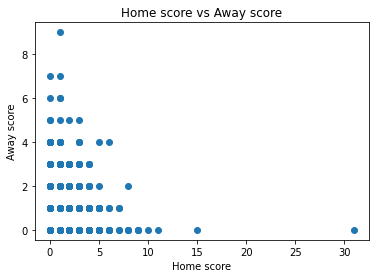

In [135]:
#lets plot a scatter plot
plt.scatter(finaldf["home_score"] , finaldf["away_score"])

# title
plt.title('Home score vs Away score')

# x axis
plt.xlabel('Home score')

# y axis
plt.ylabel('Away score')


# viz scatter plot
plt.show()

      Correlation betweem home score an away score is negative.

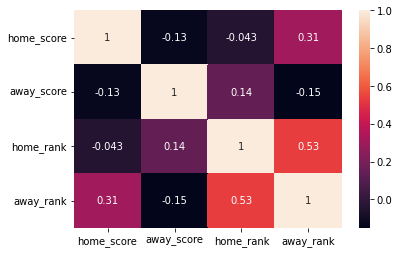

In [136]:
# heatmap showing correlation of numerical variables
sns.heatmap(finaldf.corr(),annot=True)
plt.show()

ii) Numerical-Categorical variables

In [ ]:
# Bar plot function
def BarPlotBiv(x,y, finaldf):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(finaldf[x], finaldf[y])
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

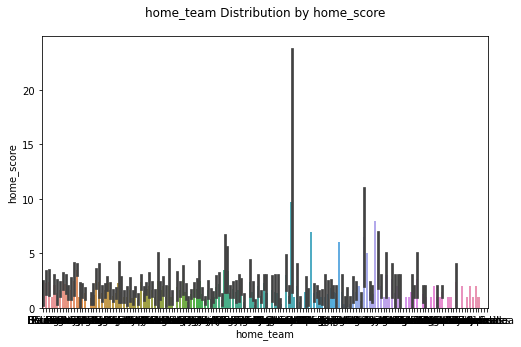

In [137]:
# Plot
BarPlotBiv('home_team', 'home_score', finaldf)

# **7. Implementing Solution**

In [140]:
# In this section we shall carry out linear regression to attain a high level of accuracy in our models
# we first import neccessart libraries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [141]:
# before we check for multicoliinearity, we need to make a copy of our data set
# we then check for multicollinearity as we dont biased results
finaldf1 = finaldf.copy()
finaldf1.head()


,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,away_rank,Outcome
0,1993-08-08,Bolivia,Uruguay,3,1,Other,Bolivia,59,22,Win
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,14,Draw
2,1993-08-08,Ecuador,Venezuela,5,0,Other,Ecuador,35,94,Win
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,86,Win
4,1993-08-08,Paraguay,Argentina,1,3,Other,Paraguay,67,5,Lose


In [147]:
# Its important to check for multocollinearity, as we dont want a poor performing model
correlationz = finaldf1.corr()

correlationz

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.132413,-0.043381,0.309322
away_score,-0.132413,1.000000,0.143060,-0.151524
home_rank,-0.043381,0.143060,1.000000,0.534618
away_rank,0.309322,-0.151524,0.534618,1.000000


In [143]:
# vif
# 
pd.DataFrame(np.linalg.inv(correlationz.values), index = correlationz.index, columns=correlationz.columns)

,home_score,away_score,home_rank,away_rank
home_score,1.186436,0.026235,0.338555,-0.544013
away_score,0.026235,1.103430,-0.338521,0.340060
home_rank,0.338555,-0.338521,1.605364,-1.014273
away_rank,-0.544013,0.340060,-1.014273,1.762051


      VIFs are all below 5, hence we can proceed.

### Polynomial Regression

In [152]:
# we shall start with polynomial regression for home scores
# Predict using Polynomial Regression
polydf =  finaldf1.groupby(['home_rank']).mean()

polydf.head()

,home_score,away_score,away_rank
home_rank,,,
1,2.000000,0.625000,36.875000
2,1.142857,0.714286,35.714286
3,1.714286,0.857143,33.142857
4,1.166667,1.166667,25.000000
5,1.444444,0.333333,29.222222


In [154]:
# set x and y varaibles

X = polydf.index.values.reshape(-1,1)

y = polydf['home_score'].values.reshape(-1,1)


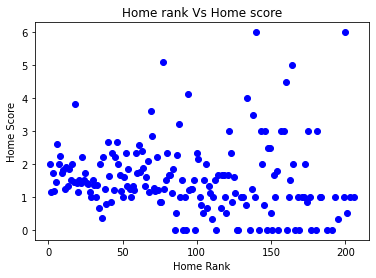

In [155]:
#  Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Home rank Vs Home score')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()

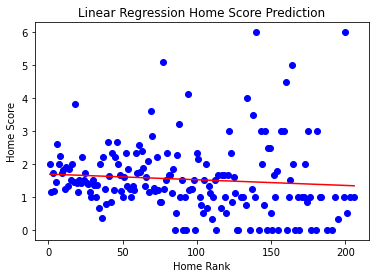

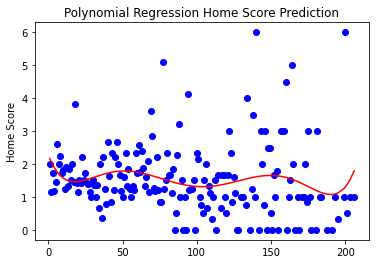

In [156]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset
# to compare the linear regression model to the polynomial regression model
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression Home Score Prediction')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Polynomial Regression Home Score Prediction')
plt.ylabel('Home Score')
plt.show()

In [157]:
# Predict using Polynomial Regression
# 

poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)


Polynomial prediction: 1


### i)Cross validation using KFold

In [159]:
from sklearn.model_selection import KFold
from sklearn import metrics

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.5863959008952307

Training model 2
Model 2 Root Mean Squared Error: 0.6811435218503109

Training model 3
Model 3 Root Mean Squared Error: 1.0607002827369456

Training model 4
Model 4 Root Mean Squared Error: 1.306936198071798

Training model 5
Model 5 Root Mean Squared Error: 1.4588278310680198


      Model 1 is most suitable.

In [160]:
# away scores
polydf =  finaldf1.groupby(['away_rank']).mean()

polydf.head()

,home_score,away_score,home_rank
away_rank,,,
1,1.200000,1.600000,23.800000
2,0.727273,1.636364,42.545455
3,0.909091,1.363636,43.272727
4,1.181818,1.272727,49.090909
5,0.666667,1.666667,29.833333


In [161]:
# to get the x and y variables

X = polydf.index.values.reshape(-1,1)

y = polydf['away_score'].values.reshape(-1,1)


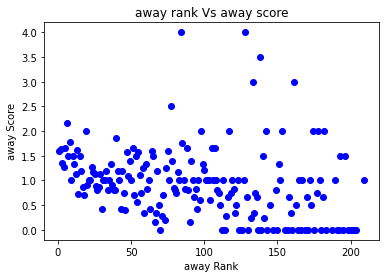

In [162]:
#  Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('away rank Vs away score')
plt.xlabel('away Rank')
plt.ylabel('away Score')
plt.show()

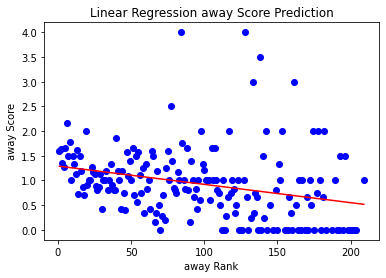

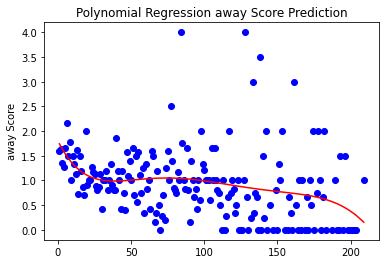

In [163]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset
# to compare the linear regression model to the polynomial regression model
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression away Score Prediction')
plt.xlabel('away Rank')
plt.ylabel('away Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Polynomial Regression away Score Prediction')
plt.ylabel('away Score')
plt.show()

In [164]:
# Predict using Polynomial Regression
# 

poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)


Polynomial prediction: 1


In [166]:
from sklearn.model_selection import KFold
from sklearn import metrics

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.352662313207759

Training model 2
Model 2 Root Mean Squared Error: 0.511227033264593

Training model 3
Model 3 Root Mean Squared Error: 0.7070223873111691

Training model 4
Model 4 Root Mean Squared Error: 0.9892958820848742

Training model 5
Model 5 Root Mean Squared Error: 0.747411652429952


      Model 1 is most suitable

# **8) Follow up questions**

### a). Did we have the right data?
        Yes.

### b). Do we need other data to answer our question?
        No.

### c). Did we have the right question?
        Yes.